In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import tensorflow as tf
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import os
import time
os.environ["CUDA_VISIBLE_DEVICES"] = "2"
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [9]:
tqdm.pandas()


def load_data(file_path):
    data = pd.read_csv(file_path, iterator=True, chunksize=1000)
    total_chunks = sum(1 for _ in open(file_path)) // 1000
    df = pd.concat([chunk for chunk in tqdm(data, total=total_chunks, desc=f'Loading {file_path}')])
    return df


train_file_path = '../../../../mnt/sda/suhohan/emnist/emnist-byclass-train.csv'
test_file_path = '../../../../mnt/sda/suhohan/emnist/emnist-byclass-test.csv'

train_data = load_data(train_file_path)
test_data = load_data(test_file_path)

train_data = train_data.sample(n=10000, random_state=42)
test_data = test_data.sample(n=1000, random_state=42)

num_train_samples = train_data.shape[0]
num_test_samples = test_data.shape[0]

x_train = train_data.iloc[:, 1:].to_numpy().reshape((num_train_samples, 28, 28, 1))
x_test = test_data.iloc[:, 1:].to_numpy().reshape((num_test_samples, 28, 28, 1))
y_train = tf.keras.utils.to_categorical(train_data.iloc[:, 0], 62)
y_test = tf.keras.utils.to_categorical(test_data.iloc[:, 0], 62)

X_train = x_train.reshape((num_train_samples, -1))
X_test = x_test.reshape((num_test_samples, -1))
y_train = np.argmax(y_train, axis=1)
y_test = np.argmax(y_test, axis=1)

Loading ../../../../mnt/sda/suhohan/emnist/emnist-byclass-train.csv: 698it [00:19, 36.65it/s]                         
Loading ../../../../mnt/sda/suhohan/emnist/emnist-byclass-test.csv: 117it [00:02, 41.53it/s]                         


# Random Forest

Training Time: 9.22 seconds
Prediction Time: 0.03 seconds
Accuracy: 70.90%


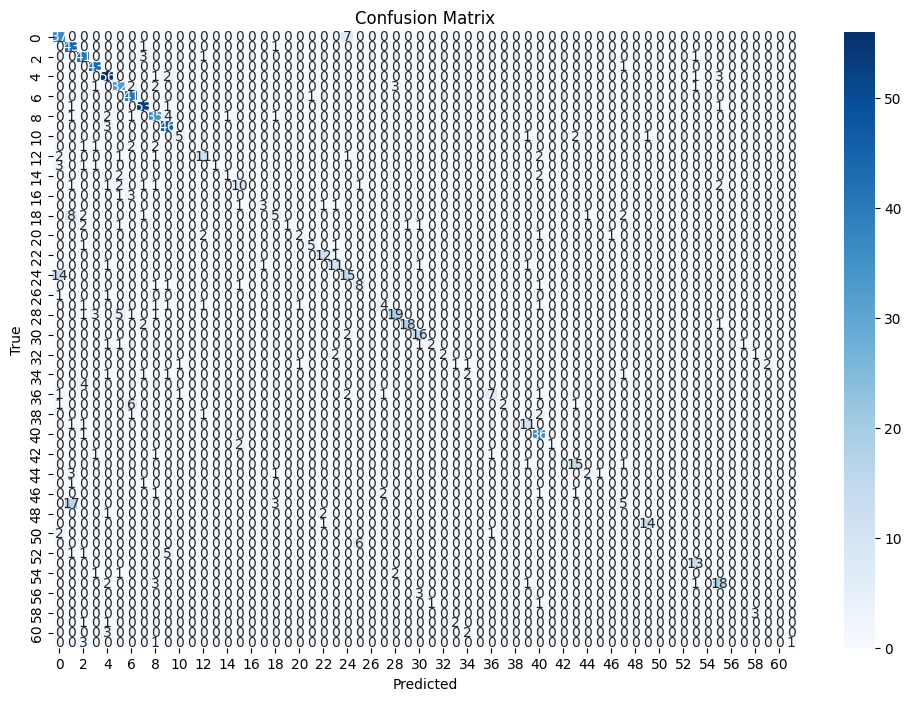

In [10]:
start_time = time.time()
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f'Training Time: {training_time:.2f} seconds')

start_time = time.time()
y_pred = rf_model.predict(X_test)
prediction_time = time.time() - start_time
print(f'Prediction Time: {prediction_time:.2f} seconds')

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# SVM

In [11]:
from sklearn.svm import SVC

Training Time: 121.72 seconds
Prediction Time: 1.97 seconds
Accuracy: 68.60%


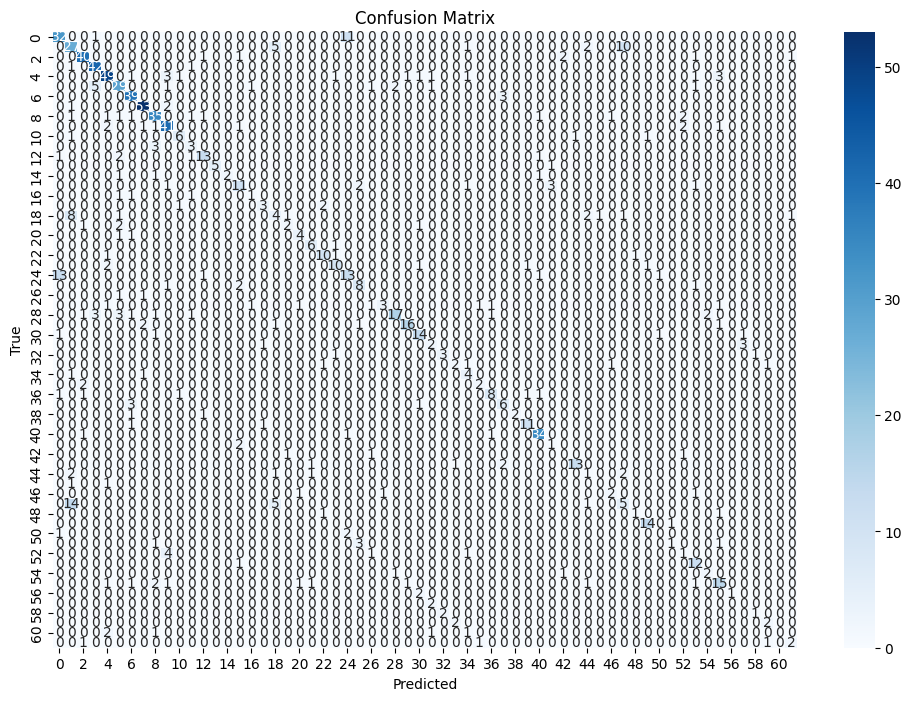

In [12]:
start_time = time.time()
svm_model = SVC(kernel='linear', random_state=42)  # 커널을 'linear'로 설정
svm_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f'Training Time: {training_time:.2f} seconds')

# 예측 및 시간 측정
start_time = time.time()
y_pred = svm_model.predict(X_test)
prediction_time = time.time() - start_time
print(f'Prediction Time: {prediction_time:.2f} seconds')

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# KNN

In [13]:
from sklearn.neighbors import KNeighborsClassifier

Training Time: 0.01 seconds
Prediction Time: 0.21 seconds
Accuracy: 67.10%


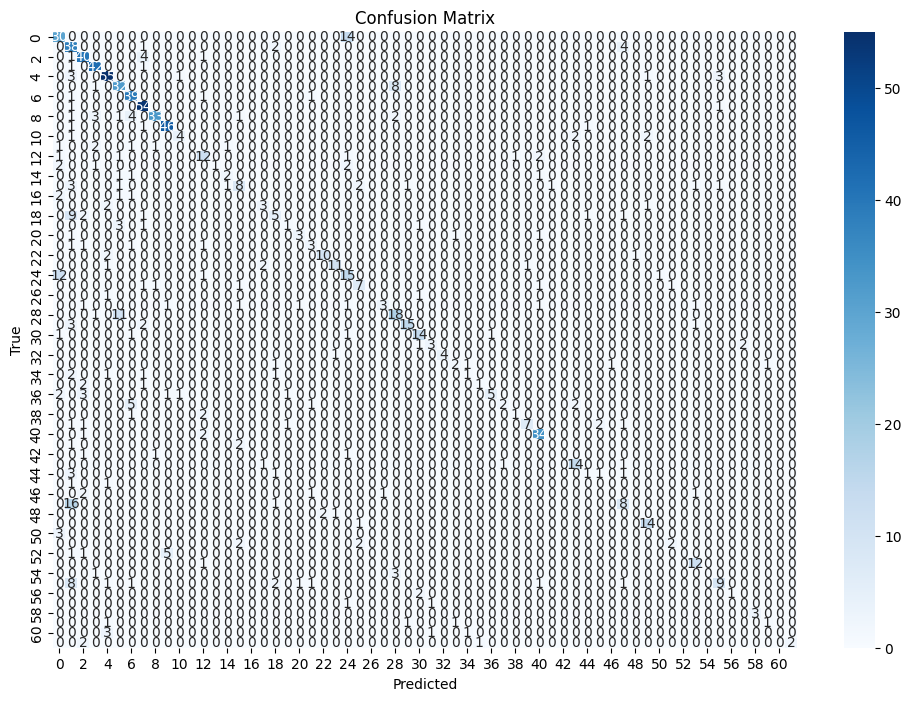

In [14]:
start_time = time.time()
knn_model = KNeighborsClassifier(n_neighbors=3)  # K=3으로 설정
knn_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f'Training Time: {training_time:.2f} seconds')

# 예측 및 시간 측정
start_time = time.time()
y_pred = knn_model.predict(X_test)
prediction_time = time.time() - start_time
print(f'Prediction Time: {prediction_time:.2f} seconds')

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression

/home/suhohan/anaconda3/envs/ann/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Time: 529.87 seconds
Prediction Time: 0.01 seconds
Accuracy: 54.80%


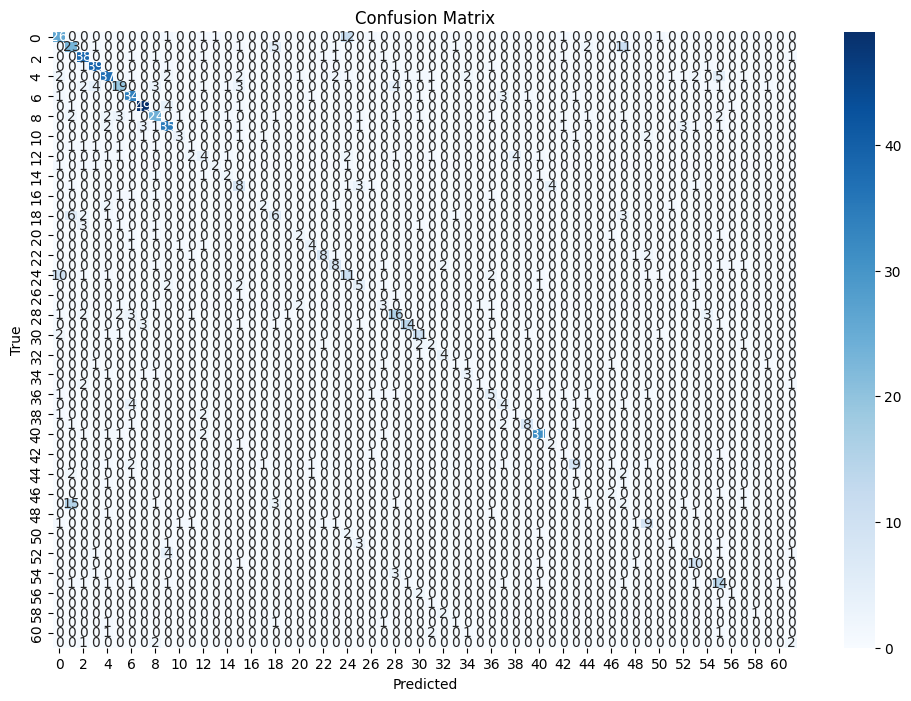

In [17]:
start_time = time.time()
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)  # max_iter를 1000으로 설정
log_reg_model.fit(X_train, y_train)
training_time = time.time() - start_time
print(f'Training Time: {training_time:.2f} seconds')

# 예측 및 시간 측정
start_time = time.time()
y_pred = log_reg_model.predict(X_test)
prediction_time = time.time() - start_time
print(f'Prediction Time: {prediction_time:.2f} seconds')

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# 혼동 행렬
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()